In [1]:
import pandas as pd
import random
import math

In [2]:
random_numbers_list = []
months_list = []
for i in range(100):
    random_numbers_list.append(round(random.uniform(50, 2000), 2)) # thousand of sales
    months_list.append(i+1)

len(random_numbers_list)

100

In [3]:
month_sales_df = pd.DataFrame(zip(months_list, random_numbers_list), columns = ['Month', 'Sales'])
print(month_sales_df.shape)

(100, 2)


# Pandas dataframe visualisations

In [4]:
def estimate_year(month):
    year = 2010 + (month // 12)
    if month % 12 == 0:
        year = year -1
    return year

def estimate_month(month):
    mon = month % 12
    if mon == 0:
        mon = 12
    return mon

In [5]:
month_sales_df['annual_month'] = month_sales_df['Month'].apply(lambda x : estimate_month(x))
month_sales_df['annual_year'] = month_sales_df['Month'].apply(lambda x : estimate_year(x))

In [6]:
month_sales_df.sort_values(['Month'])

,Month,Sales,annual_month,annual_year
0,1,1726.12,1,2010
1,2,418.72,2,2010
2,3,640.96,3,2010
3,4,172.81,4,2010
4,5,1598.67,5,2010
...,...,...,...,...
95,96,823.31,12,2017
96,97,419.53,1,2018
97,98,1006.33,2,2018
98,99,595.04,3,2018


<AxesSubplot:xlabel='Month'>

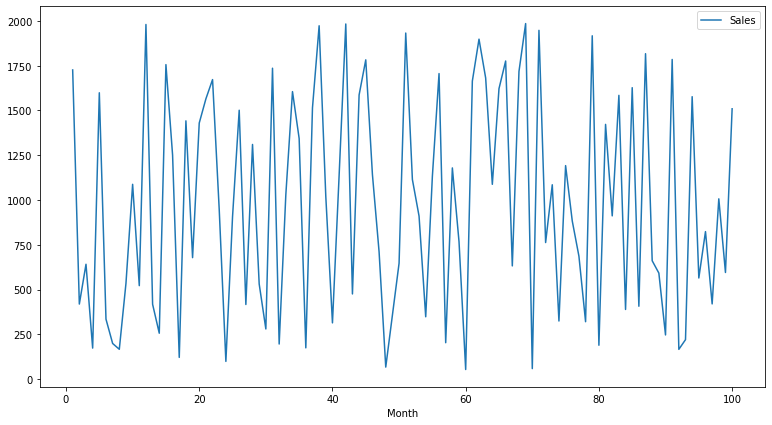

In [7]:
# Line chart
month_sales_df[['Month', 'Sales']].set_index('Month').plot(figsize=(13,7))

In [8]:
regression = pd.ols(y=month_sales_df['Sales'], x=month_sales_df['Month'])
regression.summaryregression = pd.ols(y=y, x=x)
regression.summary

AttributeError: module 'pandas' has no attribute 'ols'

In [ ]:
# Bar chart
substates_perc.sort_values('final_substates').set_index('final_substates').plot.bar(figsize=(10,4), title="Existing data Substate sizes")

# Time series data

In [10]:
month_sales_df[['Month', 'Sales']]

,Month,Sales
0,1,1205.79
1,2,1122.19
2,3,1436.01
3,4,819.75
4,5,1506.74
...,...,...
95,96,716.76
96,97,1503.23
97,98,623.62
98,99,1922.24


In [21]:
results.params

const   -1.758593e-13
Sales    1.000000e+00
dtype: float64

In [25]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
# AAPL_price = pd.read_csv('AAPL.csv',usecols=['Date', 'Close'])
# SPY_price = pd.read_csv('SPY.csv',usecols=['Date', 'Close'])
X = sm.add_constant(month_sales_df['Sales'], month_sales_df['Month'])
model = sm.OLS(month_sales_df['Sales'])
results = model.fit()
plt.scatter(month_sales_df['Month'],month_sales_df['Sales'],alpha=0.3)
y_predict = results.params[0] + results.params[1]*month_sales_df['Month']
plt.plot(month_sales_df['Month'],y_predict, linewidth=3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('OLS Regression')
print(results.summary())

TypeError: prepend must be a bool (or bool-compatible)

In [17]:
from sklearn.linear_model import LinearRegression

# Training data
X = month_sales_df.loc[:, ['Month']]  # features
y = month_sales_df.loc[:, 'Sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

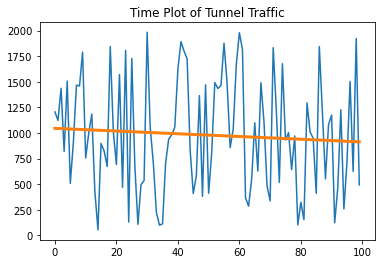

In [18]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [ ]:
# Other Example

In [9]:
month_sales_df

,Month,Sales,annual_month,annual_year
0,1,1726.12,1,2010
1,2,418.72,2,2010
2,3,640.96,3,2010
3,4,172.81,4,2010
4,5,1598.67,5,2010
...,...,...,...,...
95,96,823.31,12,2017
96,97,419.53,1,2018
97,98,1006.33,2,2018
98,99,595.04,3,2018


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
month_sales_df.set_index('Month')['Sales']

Month
1      1726.12
2       418.72
3       640.96
4       172.81
5      1598.67
        ...   
96      823.31
97      419.53
98     1006.33
99      595.04
100    1509.21
Name: Sales, Length: 100, dtype: float64

Text(0.5, 1.0, 'Sales per month')

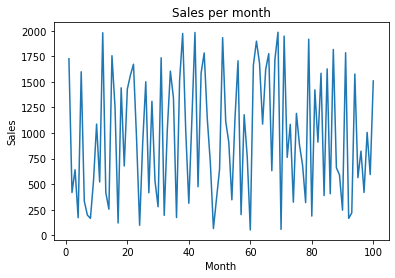

In [29]:
sns.lineplot(data=month_sales_df, x="Month", y="Sales")
plt.title("Sales per month")

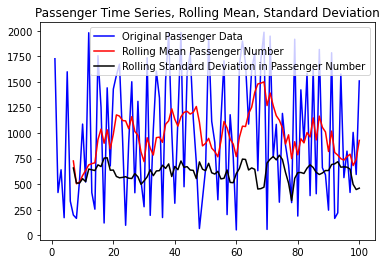

In [30]:
df = month_sales_df.set_index('Month')['Sales']
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

plt.plot(df, color="blue",label="Original Passenger Data")

plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")

plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")

plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")

plt.legend(loc="best")


In [31]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                                                                                                "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -1.199696e+01              Test Statistics
1  3.416246e-22                      p-value
2  0.000000e+00             No. of lags used
3  9.900000e+01  Number of observations used
4 -3.498198e+00          critical value (1%)
5 -2.891208e+00          critical value (5%)
6 -2.582596e+00         critical value (10%)


In [35]:
df['Sales']

KeyError: 'Sales'

In [37]:
autocorrelation_lag1 = df.autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df.autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df.autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df.autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  -0.19171189552214435
Three Month Lag:  0.06502326222287895
Six Month Lag:  0.11341980187637661
Nine Month Lag:  -0.21363981912655478


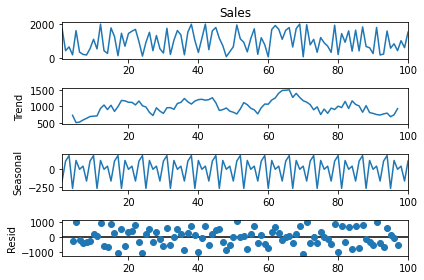

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df,model='additive', period=7)
decompose.plot()
plt.show()


In [48]:
df['Month'] = df.index
train = df[df['Month'] < 80]
train['train'] = train['Sales']
del train['Month']
del train['Sales']
test = df[df['Month'] >= 80]
del test['Month']
test['test'] = test['Sales']
del test['Sales']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

In [26]:
month_sales_df['Month'] = pd.to_datetime(month_sales_df['Month'], format='%Y-%m')
print(month_sales_df.head())


                          Month    Sales  annual_month  annual_year
0 1970-01-01 00:00:00.000000001  1205.79             1         2010
1 1970-01-01 00:00:00.000000002  1122.19             2         2010
2 1970-01-01 00:00:00.000000003  1436.01             3         2010
3 1970-01-01 00:00:00.000000004   819.75             4         2010
4 1970-01-01 00:00:00.000000005  1506.74             5         2010
